In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import pandas_profiling
import sweetviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('parkinsons.data')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

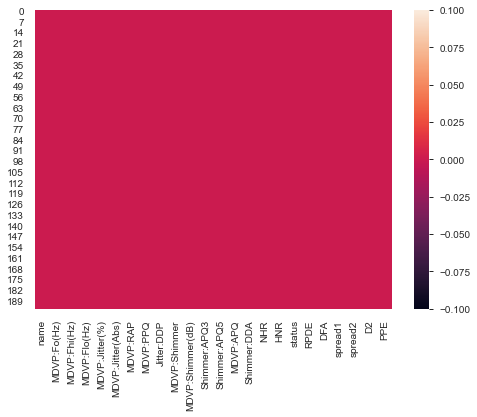

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [23]:
# report=sweetviz.analyze([df,"Data"],target_feat="status")

In [24]:
# report.show_html("report.html")

In [25]:
# panda_profilereport=pandas_profiling.ProfileReport(df)

In [11]:
# panda_profilereport

In [12]:
X=df.drop('status',axis=1)
X=X.drop('name',axis=1)
y=df['status']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

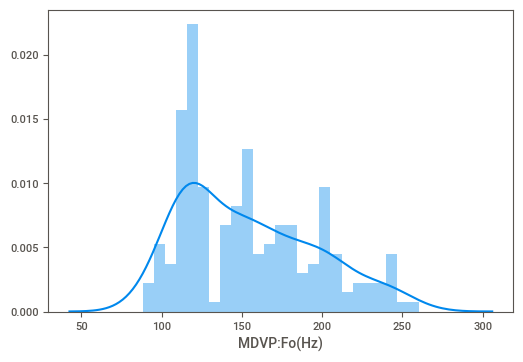

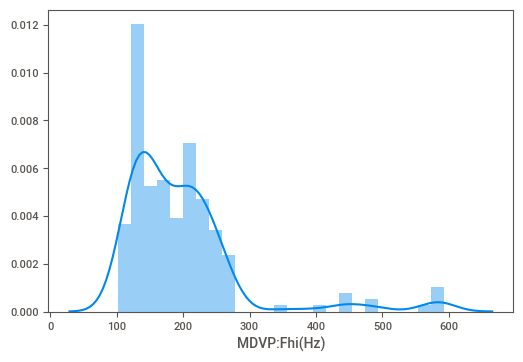

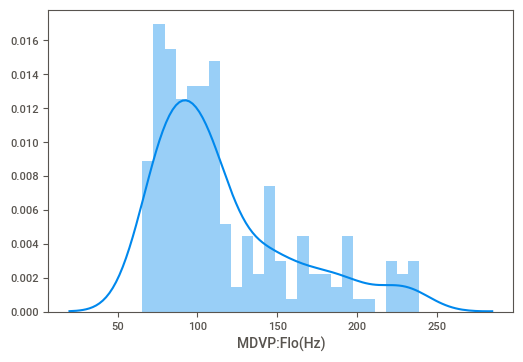

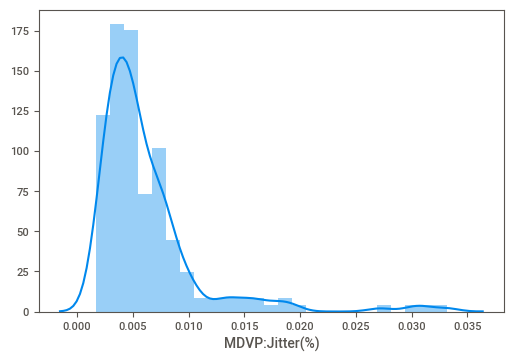

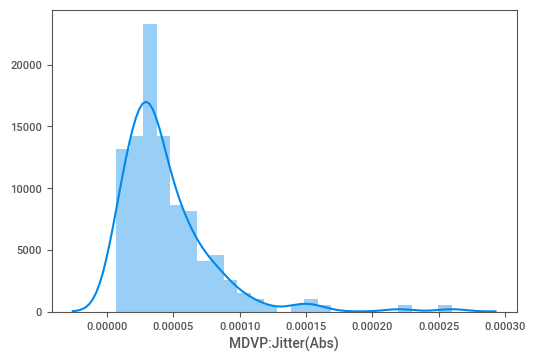

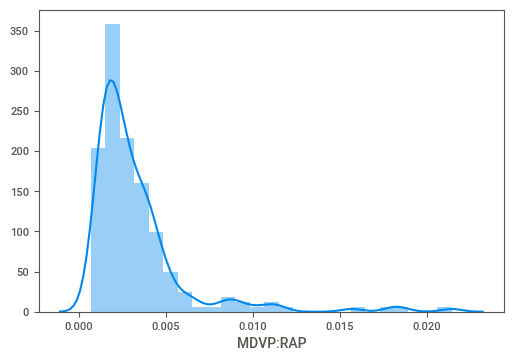

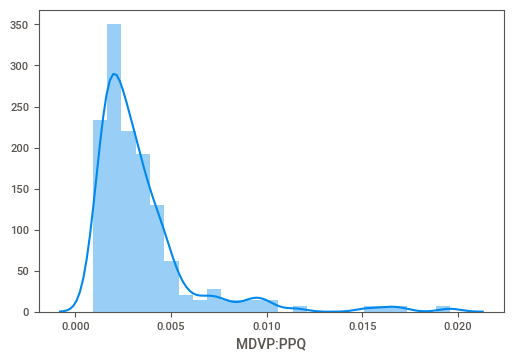

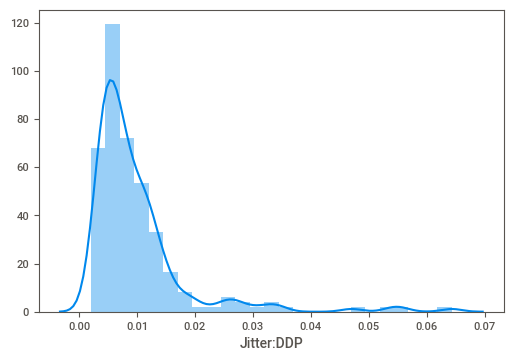

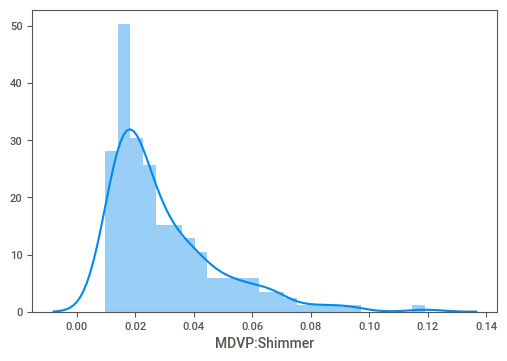

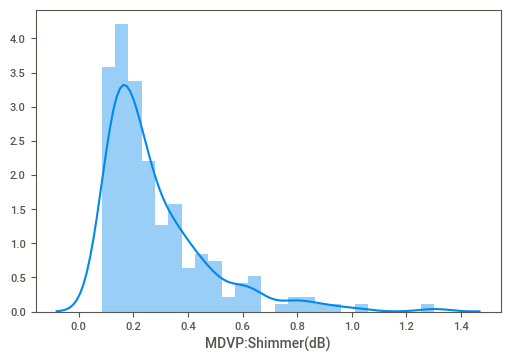

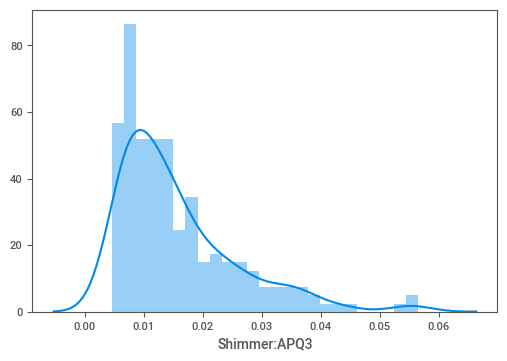

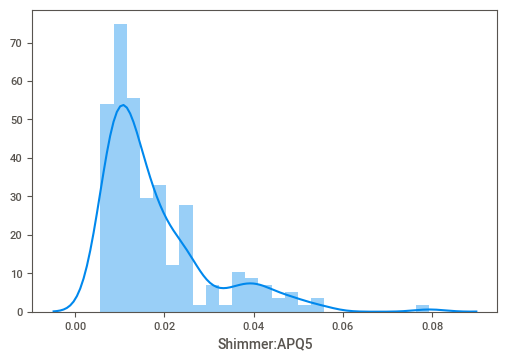

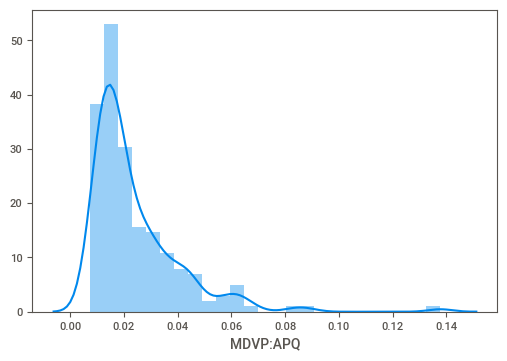

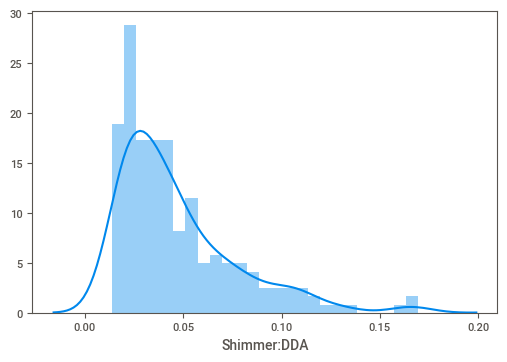

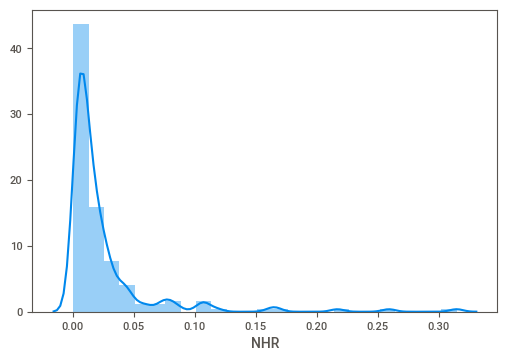

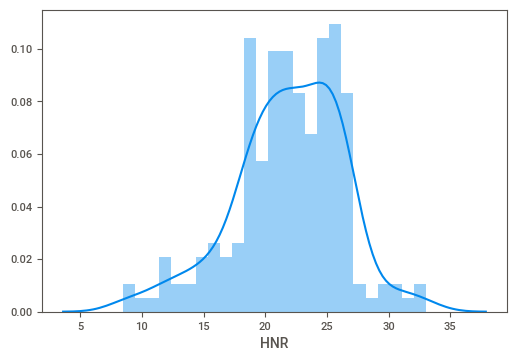

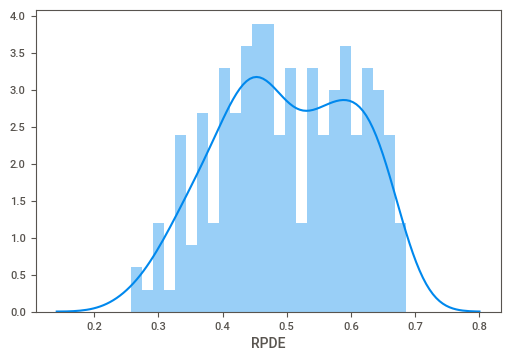

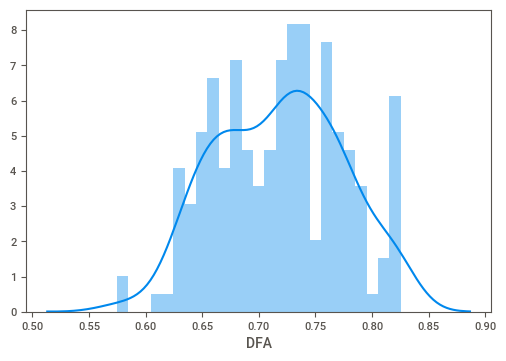

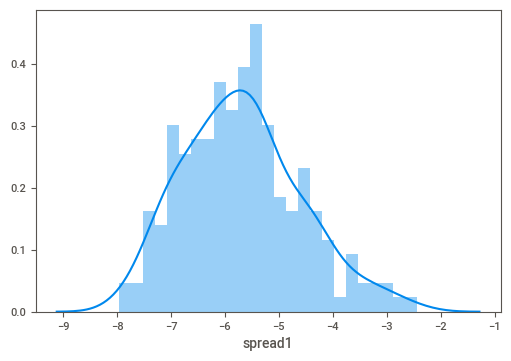

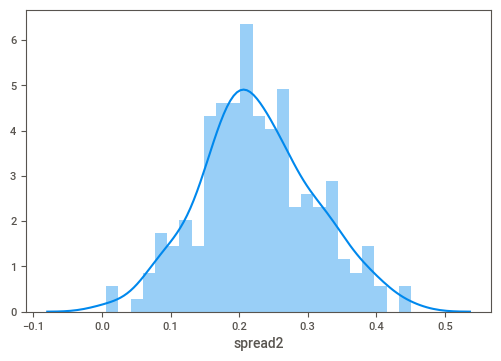

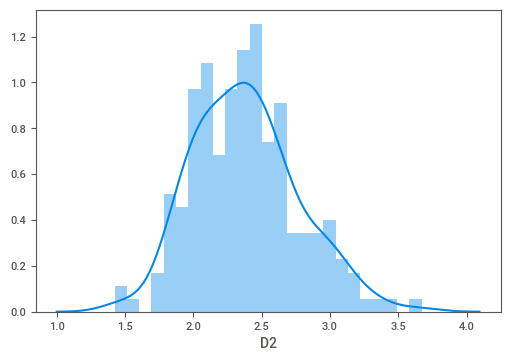

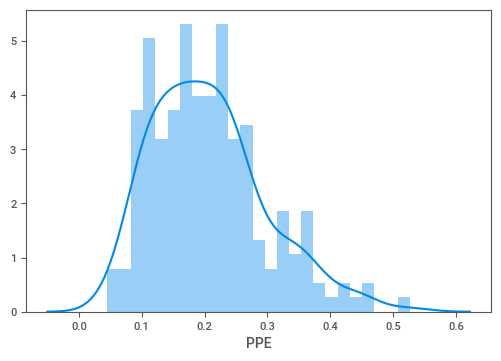

In [14]:
for i in X.columns:
    if i!='name':
        pl.figure(figsize=(6,4))

        sns.distplot(df[i],bins=25)
        pl.show()

In [15]:
temp=pd.DataFrame({'C':[],'Train_Score':[],'Test_Score':[]})

for i,j in zip(range(10),[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]):
    logistic=LogisticRegression(C=j,max_iter=10000)
    logistic.fit(X_train,y_train)
    temp.loc[i]=[j,logistic.score(X_train,y_train),logistic.score(X_test,y_test)]

In [16]:
temp

,C,Train_Score,Test_Score
0,0.00001,0.794872,0.692308
1,0.00010,0.858974,0.717949
2,0.00100,0.865385,0.717949
3,0.01000,0.852564,0.769231
4,0.10000,0.871795,0.769231
5,1.00000,0.878205,0.820513
6,10.00000,0.878205,0.820513
7,100.00000,0.878205,0.820513
8,1000.00000,0.884615,0.820513
9,10000.00000,0.897436,0.820513


In [17]:
logistic=LogisticRegression(C=0.001,max_iter=10000)
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train),logistic.score(X_test,y_test)

(0.8653846153846154, 0.717948717948718)

In [18]:
scaler=StandardScaler()
scaler.fit_transform(X_train)
X_trainscaled=scaler.fit_transform(X_train)
X_testscaled=scaler.transform(X_test)

In [19]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(X_trainscaled,y_train)
logistic.score(X_trainscaled,y_train),logistic.score(X_testscaled,y_test)

(0.8910256410256411, 0.8205128205128205)

In [20]:
temp=pd.DataFrame({'C':[],'Train_Score':[],'Test_Score':[]})

for i,j in zip(range(10),[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]):
    logistic=LogisticRegression(C=j,max_iter=10000)
    logistic.fit(X_trainscaled,y_train)
    temp.loc[i]=[j,logistic.score(X_trainscaled,y_train),logistic.score(X_testscaled,y_test)]
temp

,C,Train_Score,Test_Score
0,0.00001,0.775641,0.666667
1,0.00010,0.775641,0.666667
2,0.00100,0.775641,0.666667
3,0.01000,0.878205,0.769231
4,0.10000,0.878205,0.820513
5,1.00000,0.891026,0.820513
6,10.00000,0.897436,0.846154
7,100.00000,0.910256,0.871795
8,1000.00000,0.910256,0.871795
9,10000.00000,0.910256,0.871795


In [21]:
minmax=MinMaxScaler()
X_trainscaled=minmax.fit_transform(X_train)
X_testscaled=minmax.transform(X_test)

In [22]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(X_trainscaled,y_train)
logistic.score(X_trainscaled,y_train),logistic.score(X_testscaled,y_test)

(0.8717948717948718, 0.7692307692307693)

In [28]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [29]:
X=df_dummies.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)





In [31]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train),logistic.score(X_test,y_test)

(0.8910256410256411, 0.8974358974358975)

In [33]:
scaler=StandardScaler()
scaler.fit_transform(X_train)
X_trainscaled=scaler.fit_transform(X_train)
X_testscaled=scaler.transform(X_test)

In [34]:
logistic=LogisticRegression(max_iter=10000)
logistic.fit(X_trainscaled,y_train)
logistic.score(X_trainscaled,y_train),logistic.score(X_testscaled,y_test)

(1.0, 0.8974358974358975)